In [1]:
# %matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
file = '../data/MC1.dat'
data = np.loadtxt(file, comments='#')
X = data[:,0]
YObs = data[:,1]
print(X,YObs)

(array([0., 1., 2., 3., 4., 5.]), array([ 4.4,  6.5, 11.2, 18. , 34. , 50.5]))


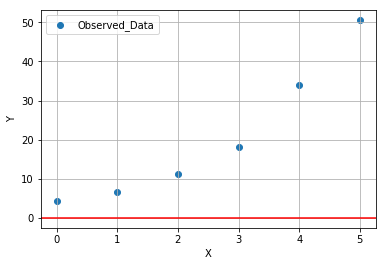

In [3]:
plt.scatter(X,YObs, label='Observed_Data')
plt.grid()
plt.axhline(y=0,c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=0)

In [4]:
def Modelo1(x,a,b,c):
    return a + b*x + c*x**2

def Chi2(a,b,c):
    Y_fit = Modelo1(X,a,b,c)
    chi2 = 0
    sigma = 1
    
    for i in range(len(X)):
        chi2 += (YObs[i] - Y_fit[i])**2/(2.*sigma**2)

    return chi2

In [5]:
print(Chi2(9,-2,1))

527.75


In [6]:
def Metropolis(a0_, b0_, c0_, WidthSteps, NSteps, burned):
    
    mcmc_steps = []
    burn_steps = 3000.
    
    for i in range(NSteps):
        
        P0 = np.exp( -Chi2(a0_,b0_,c0_) )
        
        an_ = a0_ + WidthSteps*2.*(np.random.rand()-0.5)
        bn_ = b0_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        if(c0_ == 0):
            cn_ = c0_
            
        elif(c0_ != 0):
            cn_ = c0_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        Pn = np.exp( -Chi2(an_,bn_,cn_) )
        
        if( P0 == 0):
            P0 = 0.000001
        
        alpha = Pn/P0
        
        if(burned):
            beta = np.random.rand()
            
            if(np.minimun(1,alpha) >= beta):
                a0_ = an_
                b0_ = bn_
                c0_ = cn_
            if(i >= burn_steps):
                mcmc_steps.append([a0_,b0_,c0_])
        else:
            if(alpha >= 1.0):
                mcmc_steps.append([an_,bn_,cn_])
                a0_ = an_
                b0_ = bn_
                c0_ = cn_
            else:
                beta = np.random.rand()
                
                if(alpha >= beta):
                    mcmc_steps.append([an_,bn_,cn_])
                    a0_ = an_
                    b0_ = bn_
                    c0_ = cn_
                else:
                    mcmc_steps.append([a0_,b0_,c0_])
        
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps

In [27]:
mcmc_modelo1 = Metropolis(3.,5.,0.,0.05,50000,False)

In [28]:
A = mcmc_modelo1[:,0]
B = mcmc_modelo1[:,1]
C = mcmc_modelo1[:,2]

Text(0,0.5,'$b$')

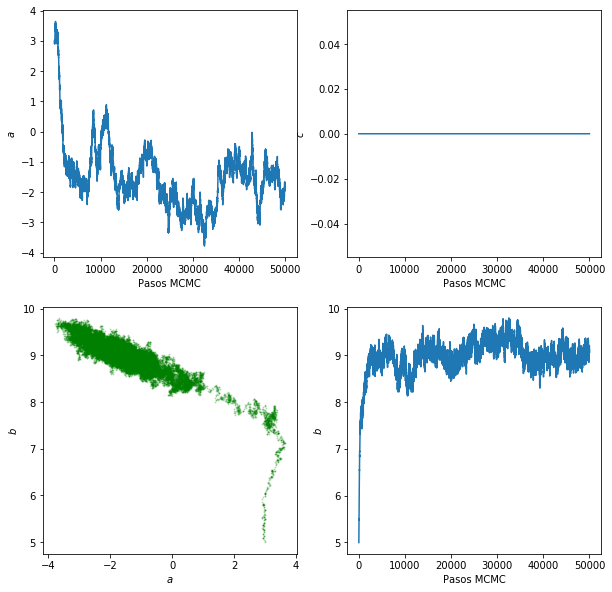

In [29]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(A)
ax1.set_xlabel("Pasos MCMC")
ax1.set_ylabel(r'$a$')

ax2.plot(C)
ax2.set_xlabel("Pasos MCMC")
ax2.set_ylabel(r'$c$')

ax3.scatter(A, B, c='g', s=1, alpha=0.2)
ax3.set_xlabel(r'$a$')
ax3.set_ylabel(r'$b$')

ax4.plot(B)
ax4.set_xlabel("Pasos MCMC")
ax4.set_ylabel(r'$b$')

Text(0.5,0,'$c$')

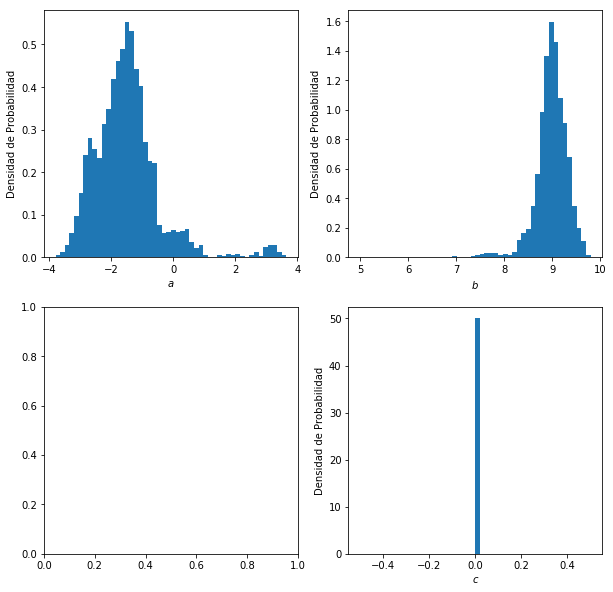

In [30]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(A, 50, density=True)
ax1.set_ylabel('Densidad de Probabilidad')
ax1.set_xlabel(r'$a$')

ax2.hist(B, 50, density=True)
ax2.set_ylabel('Densidad de Probabilidad')
ax2.set_xlabel(r'$b$')

ax4.hist(C, 50, density=True)
ax4.set_ylabel('Densidad de Probabilidad')
ax4.set_xlabel(r'$c$')

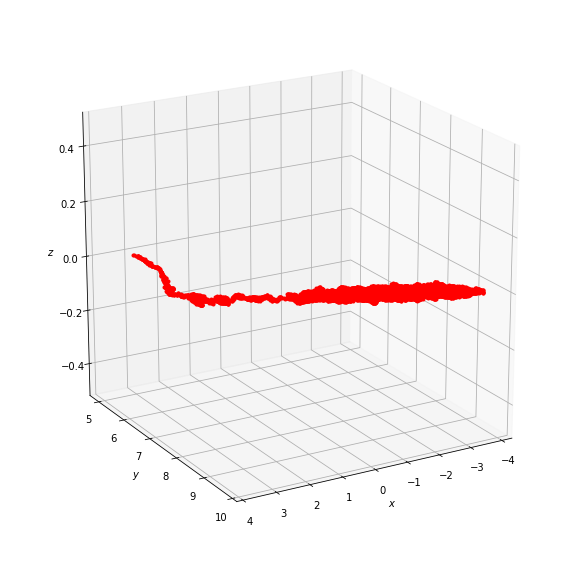

In [31]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(A,B,C, marker='.', color='r')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.set_title("")

ax.set_zlim(-0.5,0.5)

ax.view_init(20, 60)
plt.show()

In [32]:
Mean_Modelo1=[]

for i in range(3):
    data = np.percentile(mcmc_modelo1[:,i],50)
    Mean_Modelo1.append(data)
print(Mean_Modelo1)

[-1.564939958518146, 9.005866554394853, 0.0]


In [33]:
Xtest = np.linspace(0.,6.,30)
YModelo1 = Modelo1(Xtest,Mean_Modelo1[0],Mean_Modelo1[1], Mean_Modelo1[2])

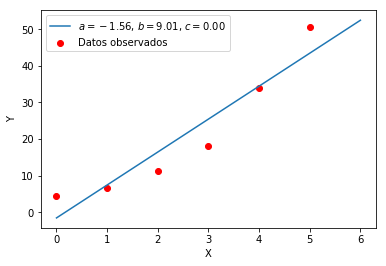

In [34]:
plt.scatter(X,YObs,c='r',label="Datos observados")
plt.plot(Xtest, YModelo1, label=r"$a= {:.2f}$, $b={:.2f}$, $c={:.2f}$".format(Mean_Modelo1[0],Mean_Modelo1[1],Mean_Modelo1[2]))
#plt.axhline(y=0, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=0)
plt.show()

In [35]:
# Veamos el chi del modelo 1

Chi2(Mean_Modelo1[0],Mean_Modelo1[1],Mean_Modelo1[2])

84.62342070822311

# Modelo 2

In [36]:
mcmc_modelo2= Metropolis(-1.5,5,2,0.05,100000,False)

In [37]:
A = mcmc_modelo2[:,0]
B = mcmc_modelo2[:,1]
C = mcmc_modelo2[:,2]

Text(0,0.5,'$b$')

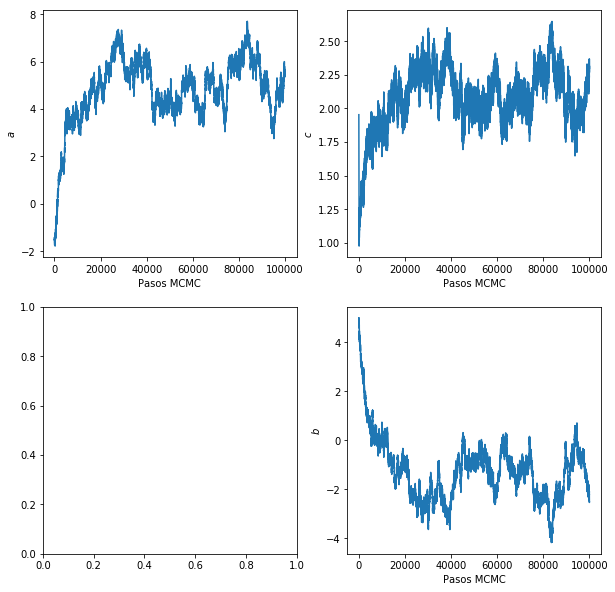

In [38]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(A)
ax1.set_xlabel("Pasos MCMC")
ax1.set_ylabel(r'$a$')

ax2.plot(C)
ax2.set_xlabel("Pasos MCMC")
ax2.set_ylabel(r'$c$')

#ax3.scatter(A, B, c='g', s=1, alpha=0.2)
#ax3.set_xlabel(r'$a$')
#ax3.set_ylabel(r'$b$')

ax4.plot(B)
ax4.set_xlabel("Pasos MCMC")
ax4.set_ylabel(r'$b$')

Text(0.5,0,'$c$')

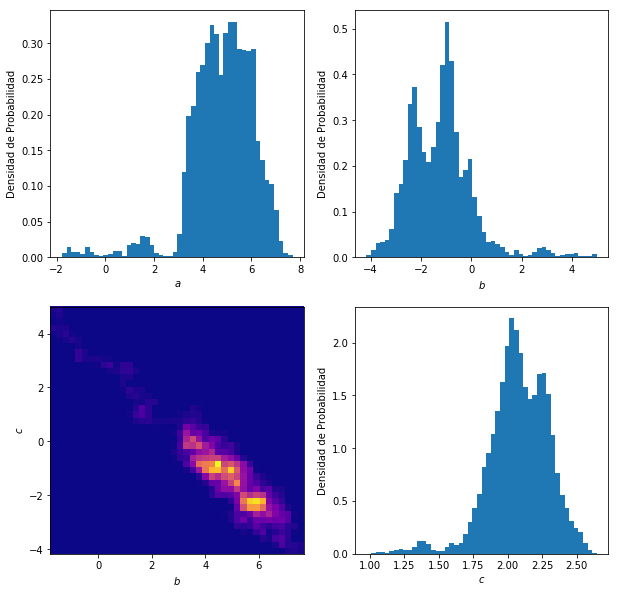

In [42]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(A, 50, density=True)
ax1.set_ylabel('Densidad de Probabilidad')
ax1.set_xlabel(r'$a$')

ax2.hist(B, 50, density=True)
ax2.set_ylabel('Densidad de Probabilidad')
ax2.set_xlabel(r'$b$')

ax3.hist2d(A, B, bins=40, normed=False, cmap='plasma')
ax3.set_xlabel(r'$b$')
ax3.set_ylabel(r'$c$')

ax4.hist(C, 50, density=True)
ax4.set_ylabel('Densidad de Probabilidad')
ax4.set_xlabel(r'$c$')

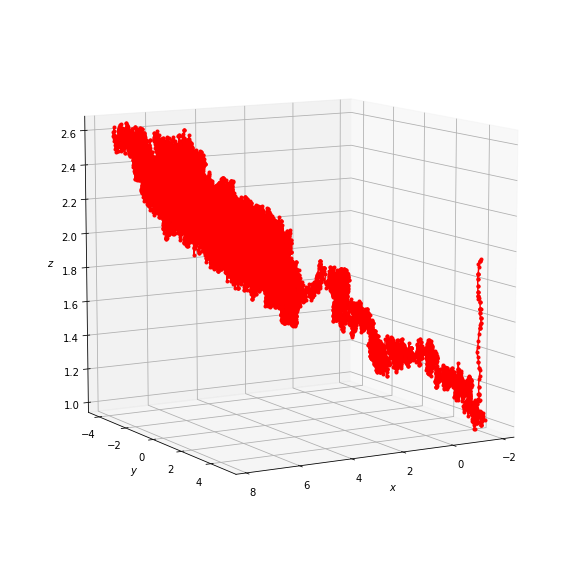

In [43]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(A,B,C, marker='.', color='r')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.set_title("")

#ax.set_zlim(-0.5,0.5)

ax.view_init(10, 60)
plt.show()

In [44]:
Mean_Modelo2=[]

for i in range(3):
    data = np.percentile(mcmc_modelo2[:,i],50)
    Mean_Modelo2.append(data)
print(Mean_Modelo2)

[4.922906866920644, -1.2040690326574588, 2.0820274062429442]


In [45]:
YModelo2 = Modelo1(Xtest,Mean_Modelo2[0],Mean_Modelo2[1], Mean_Modelo2[2])

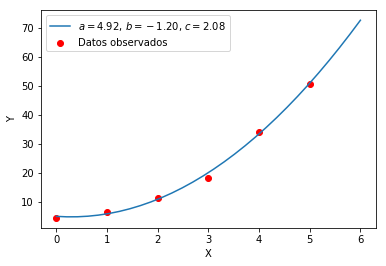

In [46]:
plt.scatter(X,YObs,c='r',label="Datos observados")
plt.plot(Xtest, YModelo2, label=r"$a= {:.2f}$, $b={:.2f}$, $c={:.2f}$".format(Mean_Modelo2[0],Mean_Modelo2[1],Mean_Modelo2[2]))
#plt.axhline(y=0, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=0)
plt.show()

In [47]:
# Veamos el chi del modelo 2

Chi2(Mean_Modelo2[0],Mean_Modelo2[1],Mean_Modelo2[2])

2.815425771435368

# Notar que la bondad del ajuste, se basa en el valor de la funcion de costo del problema. El menor $\chi^{2}$ nos da el mejor modelo.